# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
churn = pd.read_csv('internet_service_churn.csv')
churn.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
churn.rename(columns={'reamining_contract': 'remaining_contract'},inplace=True)
churn.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
churn.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [85]:
# Checking for the percentage of churning customers

round(churn['churn'].value_counts(normalize=True)*100,2)

1    55.71
0    44.29
Name: churn, dtype: float64

# Data Preprocessing

### Checking for Missing and Unique Values

In [6]:
# Missing Values

churn.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

**Observation**

 `reamining_contract, download_avg and upload_avg` all have missing values. 
<p> To determine if to drop or keep these missing values, I will check the missing values as a percentage of the total number of rows in the data set </p>

In [8]:
# Unique Values
churn.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
remaining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

 A few columns have too many unique values. I will check them in percentage of the entire row numbers and see the ones to drop

In [10]:

def missing_unique(df):
    for column in df.columns:
        missing_vals = df.isnull().sum()
        missing_percent = round(df.isnull().sum() / len(df),2) * 100
        unqiue_vals = df.nunique()
        unique_percent = round(df.nunique() / len(df),2) * 100
        
        return pd.concat([missing_vals,missing_percent,unqiue_vals,unique_percent],axis=1, keys=['missing_vals','missing_percent','unqiue_vals','unique_percent'])
            

missing_unique(churn)

,missing_vals,missing_percent,unqiue_vals,unique_percent
id,0,0.0,72274,100.0
is_tv_subscriber,0,0.0,2,0.0
is_movie_package_subscriber,0,0.0,2,0.0
subscription_age,0,0.0,1110,2.0
bill_avg,0,0.0,179,0.0
remaining_contract,21572,30.0,247,0.0
service_failure_count,0,0.0,19,0.0
download_avg,381,1.0,2856,4.0
upload_avg,381,1.0,802,1.0
download_over_limit,0,0.0,8,0.0


In [11]:
# The id column has 100% unique values. I am going to drop it.

churn.drop('id', axis=1, inplace=True)

The `reamining_contract` column has 30% missing values. I am going to do imputation on this. Since the `download_avg` and `upload_avg` columns have just 1% missing values each, I am dropping the missing values.

<p> Since how we handle the missing values in our observations impact our model accuracy significantly, It is crucial to be methodical and careful when replacing them. </p>

<p> Here I will investigate the missing values in the `reamining_contract` column, to be able to know how to go about imputing them. </p>

#### Investigating the Missing Values

In [15]:
# Splitting the dataset into 2 groups (Those whose values for the remaining_contract column were missing and those whose theirs were not)

missing_rem_con= churn.loc[churn.remaining_contract.isnull()]
missing_rem_con.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1
7,0,0,5.48,14,NaN,1,0.0,0.0,0,1
8,0,0,8.54,0,NaN,0,0.0,0.0,0,1


In [16]:
not_missing =churn.loc[churn.remaining_contract.notnull()]
not_missing.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
5,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,0,0,8.96,18,0.00,0,21.3,2.0,0,1
10,1,1,8.44,17,0.00,0,9.9,1.1,0,1


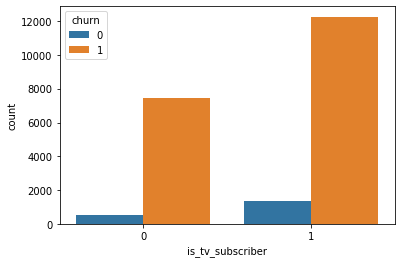

In [17]:
sns.countplot(data=missing_rem_con,x='is_tv_subscriber',hue='churn')

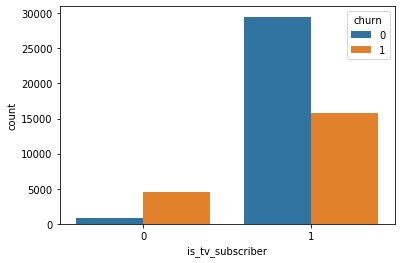

In [18]:
sns.countplot(data=not_missing,x='is_tv_subscriber',hue='churn')

**Observation**

We have a trend here! There is a significant difference between the subscribers whose values were missing for remaining_contract and those whose theirs were recorded.
 
<p> Those whose values were NOT missing and were TV subscribers were less likely to churn, and those whose values were missing, despite being TV subscribers tended to be twice as likely to churn </p>

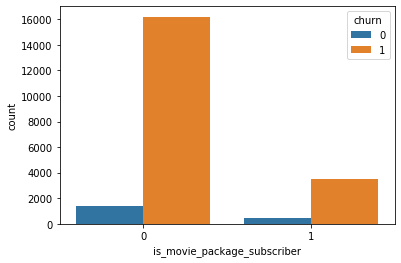

In [20]:
sns.countplot(data=missing_rem_con,x='is_movie_package_subscriber',hue='churn')

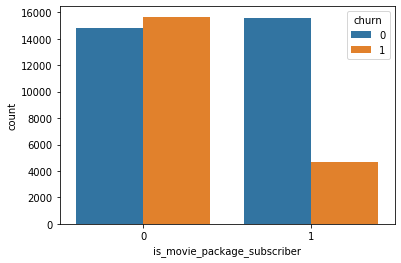

In [21]:
sns.countplot(data=not_missing,x='is_movie_package_subscriber',hue='churn')

The customers whose values for the `remaining_contract` column were missing were very less likely to be `movie_package_subscribers` and very likely to churn.
<p> Those whose values were not missing were much likely to be regular subscribers of a movie package and were less likely to churn.</p>

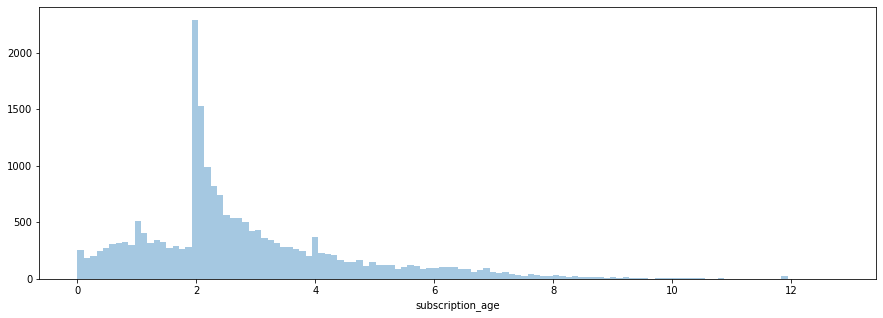

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(missing_rem_con['subscription_age'],kde=False,bins=120)

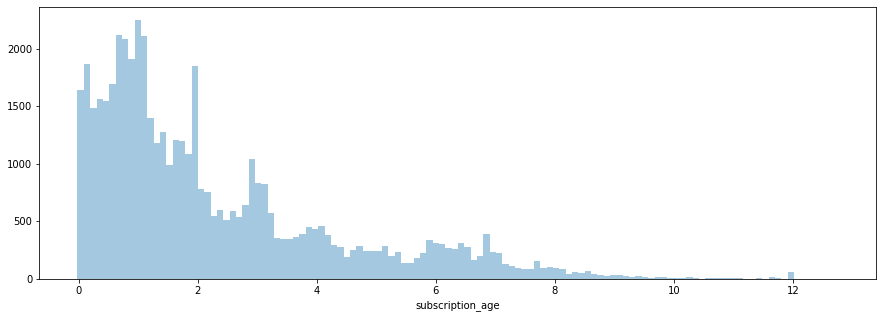

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(not_missing['subscription_age'],kde=False, bins=120)


<Figure size 2088x360 with 0 Axes>

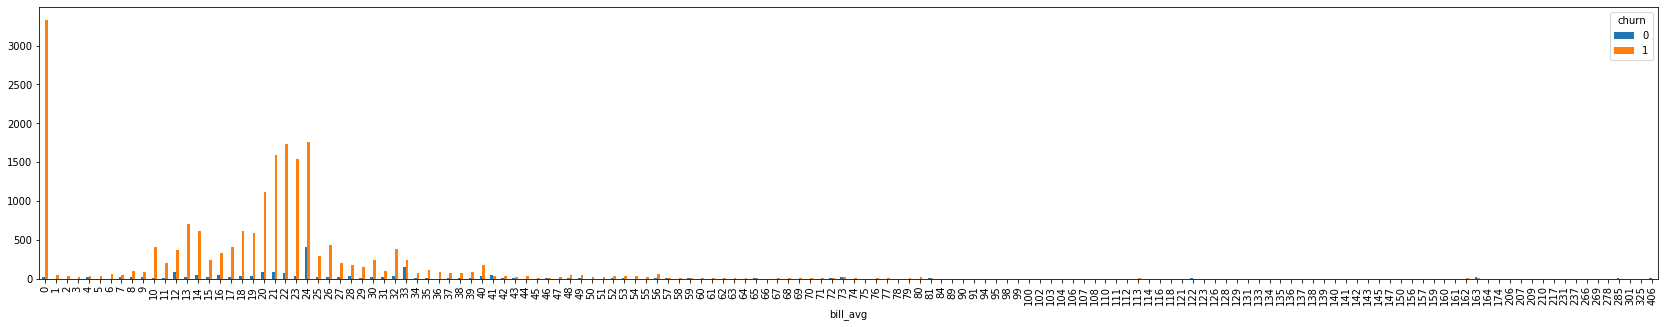

In [25]:
plt.figure(figsize=(29,5))
pd.crosstab(missing_rem_con['bill_avg'],missing_rem_con['churn']).plot.bar(figsize=(29,5))


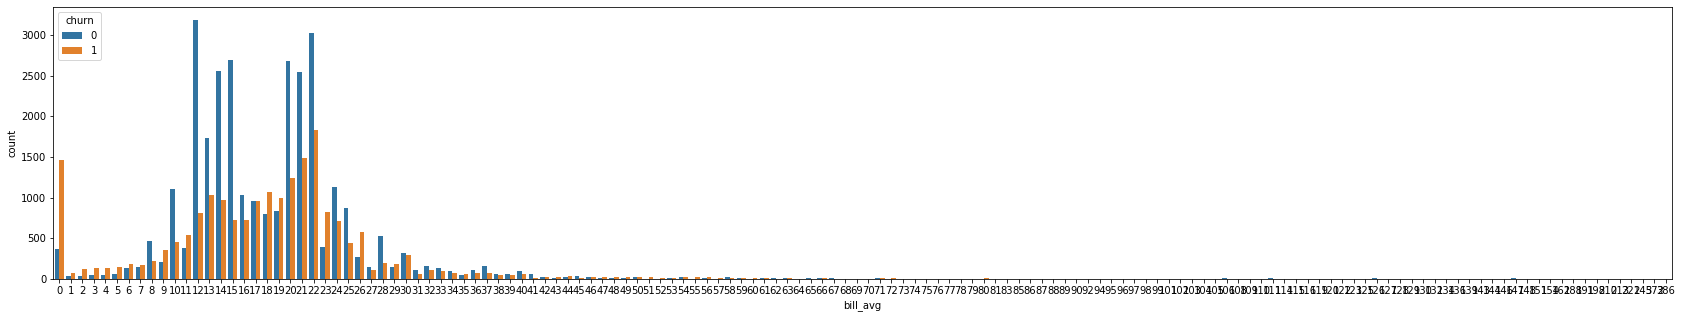

In [26]:
plt.figure(figsize=(29,5))
sns.countplot(data=not_missing,x='bill_avg',hue='churn')

The subscribers whose values for `remaining_contract` column were missing were very much likely to churn, regardless of how high their average bills were.

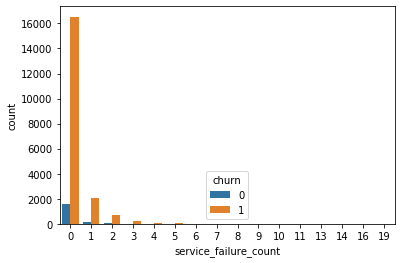

In [30]:
sns.countplot(data=missing_rem_con,x='service_failure_count',hue='churn')

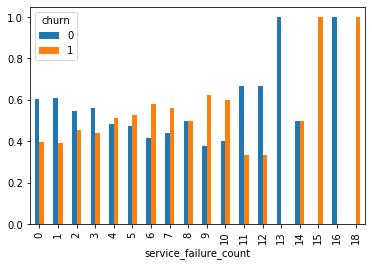

In [91]:
pd.crosstab(not_missing['service_failure_count'],not_missing['churn']).div(pd.crosstab(not_missing['service_failure_count'],not_missing['churn']).sum(1),axis=0).plot.bar()

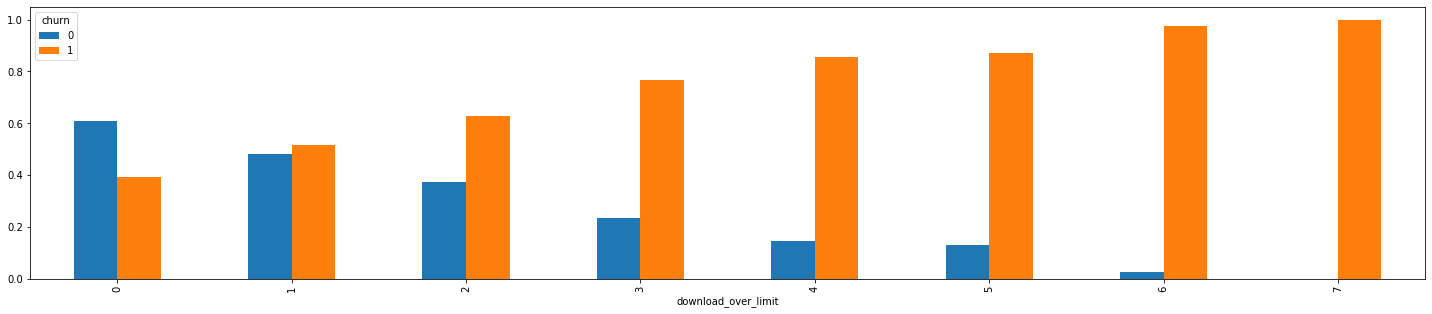

In [95]:
pd.crosstab(not_missing['download_over_limit'],not_missing['churn']).div(pd.crosstab(not_missing['download_over_limit'],not_missing['churn']).sum(1),axis=0).plot.bar(figsize=(25,5))

**Observation**

The trend is here too. The subscribers who had their values missing for the `remaining_contract` column were very much likely to churn, even when they had experienced (0) `servive_failure_count`.

<p> It is highly discernable that the subscribers whose values for the `remaining_contract` column were missing were very much likely to churn, no matter highly-rated or better the services they got were.</p>

<p> As a result, I will impute their missing values using the mean value of the churning subscribers. </p>

In [34]:
mean_of_churn = churn.loc[churn['churn']==1]['remaining_contract'].mean()
mean_of_churn

0.18315232895578185

In [35]:
churn['remaining_contract'].fillna(mean_of_churn, inplace=True)

In [36]:
churn.dropna(inplace=True)

In [37]:
missing_unique(churn)

,missing_vals,missing_percent,unqiue_vals,unique_percent
is_tv_subscriber,0,0.0,2,0.0
is_movie_package_subscriber,0,0.0,2,0.0
subscription_age,0,0.0,1109,2.0
bill_avg,0,0.0,179,0.0
remaining_contract,0,0.0,248,0.0
service_failure_count,0,0.0,19,0.0
download_avg,0,0.0,2856,4.0
upload_avg,0,0.0,802,1.0
download_over_limit,0,0.0,8,0.0
churn,0,0.0,2,0.0


In [38]:
churn.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.140000,0,8.4,2.3,0,0
1,0,0,8.22,0,0.183152,0,0.0,0.0,0,1
2,1,0,8.91,16,0.000000,0,13.7,0.9,0,1
3,0,0,6.87,21,0.183152,1,0.0,0.0,0,1
4,0,0,6.39,0,0.183152,0,0.0,0.0,0,1


# Visualizing the Data

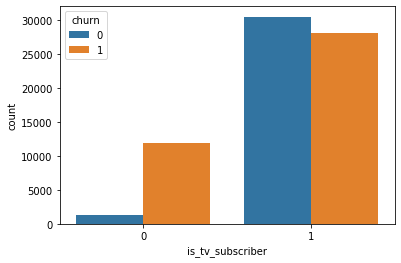

In [39]:
sns.countplot(data=churn, x= churn['is_tv_subscriber'],hue='churn')

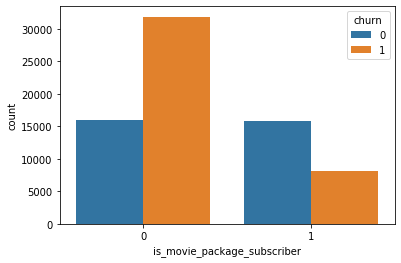

In [40]:
sns.countplot(data=churn, x= churn['is_movie_package_subscriber'],hue='churn')

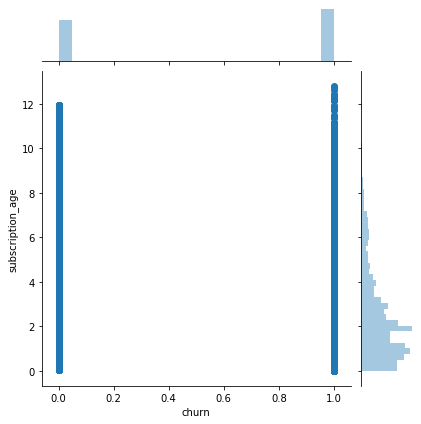

In [41]:

sns.jointplot(data = churn, x= 'churn', y = churn['subscription_age'])

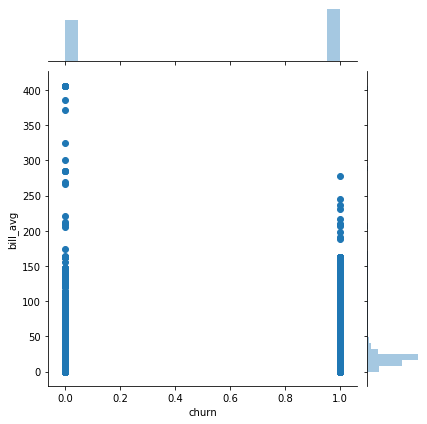

In [42]:
sns.jointplot(data = churn, x= 'churn', y = churn['bill_avg'])

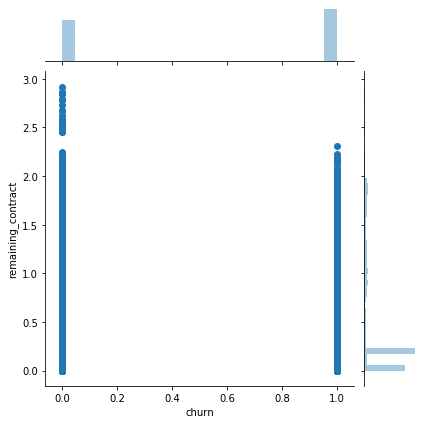

In [43]:
sns.jointplot(data = churn, x= 'churn', y = churn['remaining_contract'])

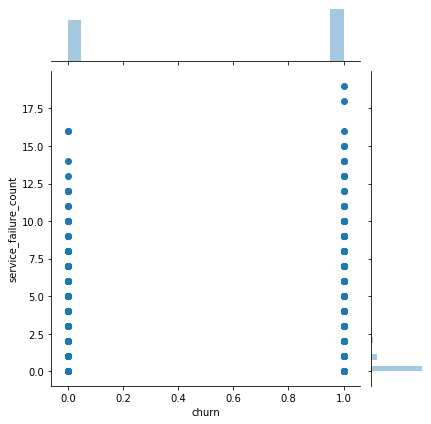

In [44]:
sns.jointplot(data = churn, x= 'churn', y = churn['service_failure_count'])

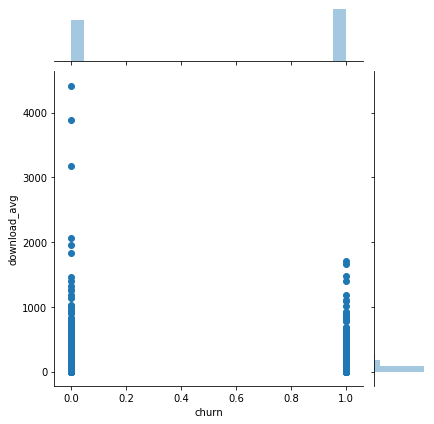

In [45]:
sns.jointplot(data = churn, x= 'churn', y = churn['download_avg'])

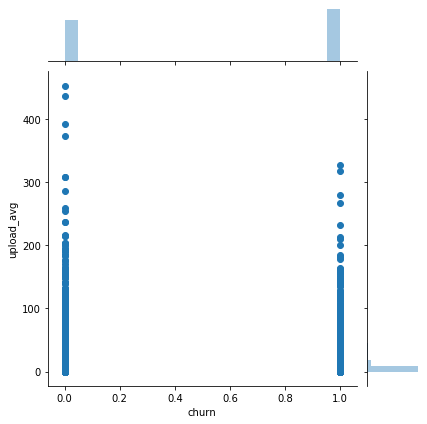

In [46]:
sns.jointplot(data = churn, x= 'churn', y = churn['upload_avg'])

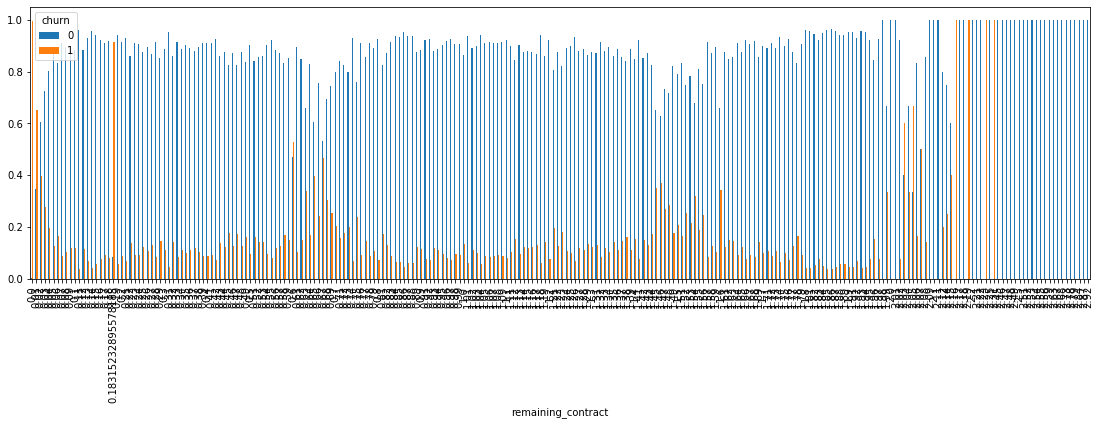

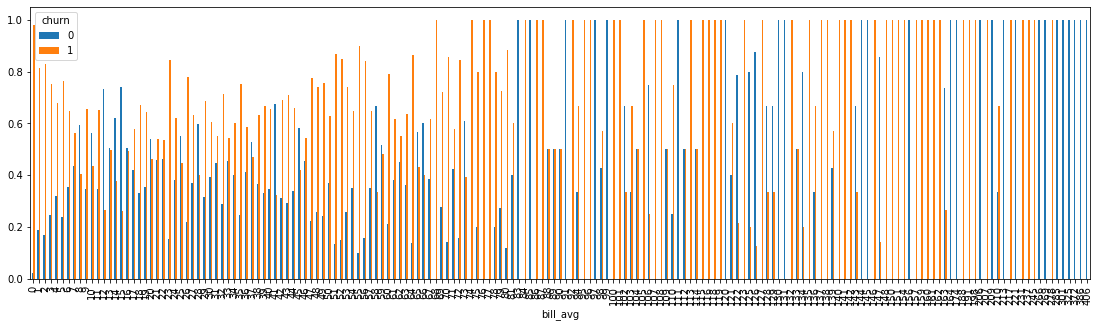

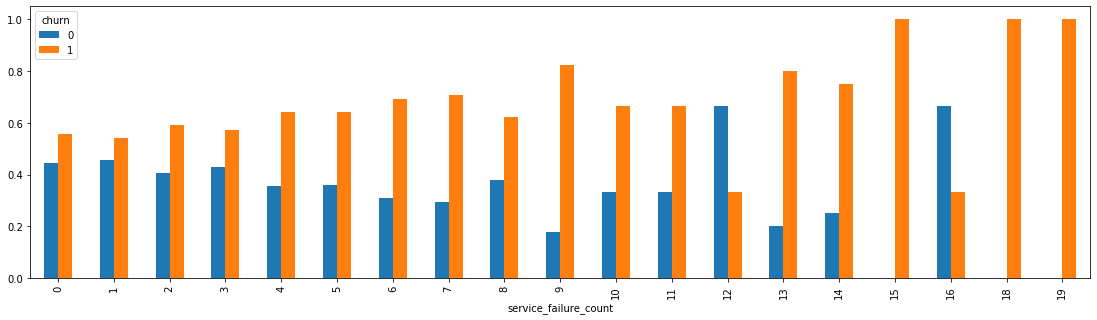

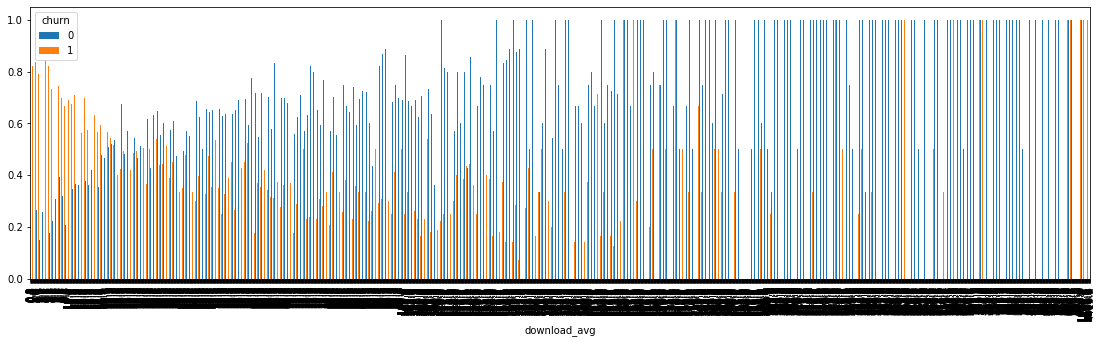

In [48]:
column_list = ['remaining_contract','bill_avg','service_failure_count','download_avg']

for column in column_list:
    data = pd.crosstab(churn[column],churn['churn'])
    data.div(data.sum(1).astype(float),axis=0).plot.bar(figsize=(19,5))
#data.div(data.sum(1).astype(float),axis=0)

In [78]:
X = churn.copy()
X.drop('churn', axis=1,inplace=True)
y=churn['churn']


# Training the Model

In [97]:
# Split the data into training and testing sets


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [98]:
# Selecting Random Forest for the Classification

from sklearn.ensemble import RandomForestClassifier
log_model = RandomForestClassifier(class_weight='balanced')

In [53]:
log_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_hat= log_model.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
# Evaluating Model Accuracy

confusion_matrix(y_test,y_hat)

array([[7535,  431],
       [ 621, 9387]], dtype=int64)

In [57]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7966
           1       0.96      0.94      0.95     10008

    accuracy                           0.94     17974
   macro avg       0.94      0.94      0.94     17974
weighted avg       0.94      0.94      0.94     17974



# Conclusion

* I have performed the customer churn analysis for an internet subscription provider. About 55.7% of their customers churned, while just 44.3% did not. That amount of the churning customers raised a concern

* The majority of the churned customers were the ones whose values were not recorded for the remaining_contract column. Nearly all of the keys factors that were strongly likely to make a customer NOT to churn did NOT prevent these churned customers from churning. 

* Efforts could be made towards investigating the reasons the values for `remaining_contract` were missing for a large amount of customers and ensure the causes do not happen to the non-churning customers. To ensure the same do not happen to the future customers and see how it can be salvaged or reverted for the churned customers. 

* Key factors like `Remaining Contract, Average Download, TV Subscription, Movie Subscription, Average Upload, Susbription Age`, were much likely to prevent the average customer from churning hence, these should be very much focused on.

* While other factors like `Average Bill, Service` Failure Count did not show any discernable association with churn. 

* A sole factor like Download Overlimit showed much association with the churn likelihod of a customer. The higher the Download Overlimit rate of a customer, the higher the chance of them churning.
